<a href="https://colab.research.google.com/github/guptamanishacs/manisha80/blob/main/T080_Hypothesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()


Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [4]:
# ==================== SECTION 1: IMPORT LIBRARIES ====================

import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest


In [7]:
import pandas as pd

df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
# ==================== SECTION 3: DATA CLEANING ====================

# Drop ID column if present
if 'id' in df.columns:
    df = df.drop(columns=['id'])

# Ensure stroke column is integer
df['stroke'] = df['stroke'].astype(int)

# Display dataset shape
print("Rows:", df.shape[0], "Columns:", df.shape[1])
print("Columns:", list(df.columns))
print()

# Handle missing BMI (fill using median)
if 'bmi' in df.columns:
    median_bmi = df['bmi'].median()
    df['bmi'] = df['bmi'].fillna(median_bmi)
    print("Missing BMI values filled with Median:", median_bmi)


Rows: 5110 Columns: 11
Columns: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

Missing BMI values filled with Median: 28.1


In [10]:
# ==================== SECTION 4: GROUPING ====================

group0 = df[df['stroke'] == 0]  # No-stroke group
group1 = df[df['stroke'] == 1]  # Stroke group

alpha = 0.05  # significance level


In [11]:
# ==================== SECTION 5: TEST A – t-test on AGE ====================

print("=== Hypothesis Test A: Mean Age (Stroke vs No-Stroke) ===")

age0 = group0['age'].dropna()
age1 = group1['age'].dropna()

print("n(no-stroke) =", len(age0), " n(stroke) =", len(age1))

# Levene test for variance equality
levene_stat, levene_p = stats.levene(age0, age1)
print("Levene p-value =", levene_p)

# Perform t-test
t_res = stats.ttest_ind(age0, age1, equal_var=(levene_p >= alpha))
print("t-statistic =", t_res.statistic, " p-value =", t_res.pvalue)

# Decision
if t_res.pvalue < alpha:
    print("Conclusion: Reject H0 → Mean ages differ significantly.")
else:
    print("Conclusion: Fail to Reject H0 → No significant difference in mean ages.")
print()


=== Hypothesis Test A: Mean Age (Stroke vs No-Stroke) ===
n(no-stroke) = 4861  n(stroke) = 249
Levene p-value = 1.0651819334659263e-29
t-statistic = -29.68626563006023  p-value = 2.115684848347272e-95
Conclusion: Reject H0 → Mean ages differ significantly.



In [12]:
# ==================== SECTION 6: TEST B – avg_glucose_level ====================

print("=== Hypothesis Test B: avg_glucose_level ===")

g0 = group0['avg_glucose_level'].dropna()
g1 = group1['avg_glucose_level'].dropna()

print("n(no-stroke) =", len(g0), " n(stroke) =", len(g1))

# Levene test for variance
lev_stat, lev_p = stats.levene(g0, g1)

# Use Welch t-test
t_res = stats.ttest_ind(g0, g1, equal_var=(lev_p >= alpha))
print("t-statistic =", t_res.statistic, " p-value =", t_res.pvalue)

# Decision
if t_res.pvalue < alpha:
    print("Conclusion: Reject H0 → Glucose level differs between groups.")
else:
    print("Conclusion: Fail to Reject H0 → No evidence of glucose difference.")
print()


=== Hypothesis Test B: avg_glucose_level ===
n(no-stroke) = 4861  n(stroke) = 249
t-statistic = -6.982411744792963  p-value = 2.4014366563697676e-11
Conclusion: Reject H0 → Glucose level differs between groups.



In [13]:
# ==================== SECTION 7: TEST C – Chi-Square ====================

print("=== Hypothesis Test C: Smoking Status vs Stroke ===")
table = pd.crosstab(df['smoking_status'], df['stroke'])
print(table)
chi2, p, dof, expected = stats.chi2_contingency(table)
print("\nChi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

if p < alpha:
    print("Conclusion: Reject H0 → Smoking status is associated with stroke.")
else:
    print("Conclusion: Fail to Reject H0 → No relation found.")
print()


=== Hypothesis Test C: Smoking Status vs Stroke ===
stroke              0   1
smoking_status           
Unknown          1497  47
formerly smoked   815  70
never smoked     1802  90
smokes            747  42

Chi-square statistic: 29.147269191399264
p-value: 2.0853997025008455e-06
Degrees of freedom: 3
Expected frequencies:
 [[1468.76399217   75.23600783]
 [ 841.87573386   43.12426614]
 [1799.80665362   92.19334638]
 [ 750.55362035   38.44637965]]
Conclusion: Reject H0 → Smoking status is associated with stroke.



In [14]:
# ==================== SECTION 8: EXTRA PROPORTION TEST ====================

print("=== EXTRA TEST: Hypertension Proportion (Stroke vs No-Stroke) ===")

count = np.array([
    group1['hypertension'].sum(),
    group0['hypertension'].sum()
])

nobs = np.array([len(group1), len(group0)])

stat, pval = proportions_ztest(count, nobs)

print("Hypertension counts:", count)
print("Sample sizes:", nobs)
print("z-statistic:", stat, " p-value:", pval)

if pval < alpha:
    print("Conclusion: Hypertension proportion differs between groups.")
else:
    print("Conclusion: No difference in hypertension proportion.")
print()


=== EXTRA TEST: Hypertension Proportion (Stroke vs No-Stroke) ===
Hypertension counts: [ 66 432]
Sample sizes: [ 249 4861]
z-statistic: 9.143110683625707  p-value: 6.068123323489741e-20
Conclusion: Hypertension proportion differs between groups.



In [15]:
# ==================== SECTION 9: SAVE SUMMARY ====================

summary = {
    'test': ['age_ttest', 'glucose_ttest', 'smoking_chi2', 'hypertension_ztest'],
    'result': [
        'See printed results',
        'See printed results',
        'See printed results',
        'See printed results'
    ]
}

output_path = r"C:\Users\manisha\Downloads\practical4_results_summary.csv"
pd.DataFrame(summary).to_csv(output_path, index=False)

print("Summary saved to:", output_path)
print("PRACTICAL 4 COMPLETE ✓")


Summary saved to: C:\Users\manisha\Downloads\practical4_results_summary.csv
PRACTICAL 4 COMPLETE ✓


In [16]:
# 1) UPLOAD DATASET
from google.colab import files
uploaded = files.upload()

# 2) IMPORT LIBRARIES
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
# 3) LOAD CSV
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
print("\nDataset Loaded Successfully\n")
print(df.head())
male = df[df['gender']=='Male']['avg_glucose_level'].dropna()
female = df[df['gender']=='Female']['avg_glucose_level'].dropna()
# means and std
mean_male = np.mean(male)
mean_female = np.mean(female)
std_male = np.std(male, ddof=1)
std_female = np.std(female, ddof=1)

# t-test
t_stat, p_val = stats.ttest_ind(male, female, equal_var=False)

print("\n================ T–TEST RESULT =================")
print(f"Male mean: {mean_male}")
print(f"Female mean: {mean_female}")
print(f"Male std: {std_male}")
print(f"Female std: {std_female}\n")
print(f"Test Statistic: {t_stat}")
print(f"p-value: {p_val}")
if p_val < 0.05:
    print("=> Reject Null Hypothesis (Means are different)")
else:
    print("=> Fail to Reject Null Hypothesis (Means are same)")
table = pd.crosstab(df['smoking_status'], df['stroke'])
chi2, p, dof, expected = stats.chi2_contingency(table)
print("\n=============== CHI-SQUARE TEST RESULT ===============")
print("Contingency Table:\n", table, "\n")
print(f"Chi-square Value: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
if p < 0.05:
    print("=> Reject Null Hypothesis (Smoking & Stroke Related)")
else:
    print("=> Fail to Reject Null Hypothesis (No relation)")
df2 = df[['work_type','avg_glucose_level']].dropna()
model = ols('avg_glucose_level ~ C(work_type)', data=df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n================ ANOVA RESULT =================")
print(anova_table)
p_anova = anova_table['PR(>F)'][0]
print(f"\np-value: {p_anova}")
if p_anova < 0.05:
    print("=> Reject Null Hypothesis (Work type affects glucose level)")
else:
    print("=> Fail to Reject Null Hypothesis (No effect)")
print("\n=========== END OF PRACTICAL OUTPUT ===========")


Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (1).csv

Dataset Loaded Successfully

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0 

/tmp/ipython-input-1960724110.py:85: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_anova = anova_table['PR(>F)'][0]


Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (2).csv
File loaded: healthcare-dataset-stroke-data (2).csv
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smo

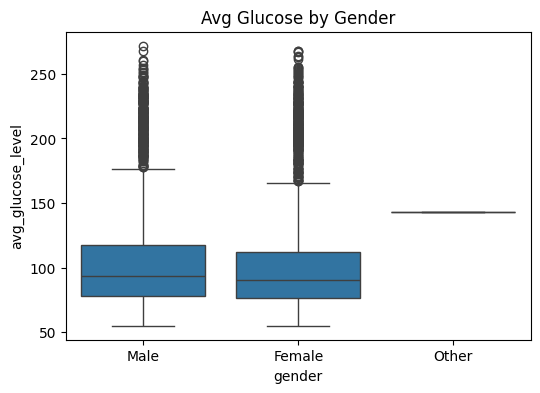


====== CHI-SQUARE (Smoking vs Stroke) ======
stroke              0   1
smoking_status           
Unknown          1497  47
formerly smoked   815  70
never smoked     1802  90
smokes            747  42
Chi-square = 29.147269191399264
p-value = 2.0853997025008455e-06
Conclusion: Reject H0 → Smoking affects stroke risk.


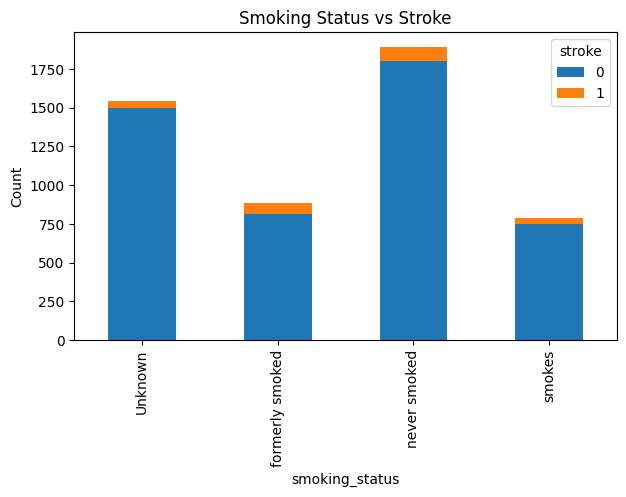


====== ANOVA (Work Type vs Glucose) ======
F-stat = 16.612272641955578
p-value = 1.558660340511671e-13
Conclusion: Reject H0 → Work type affects glucose level.


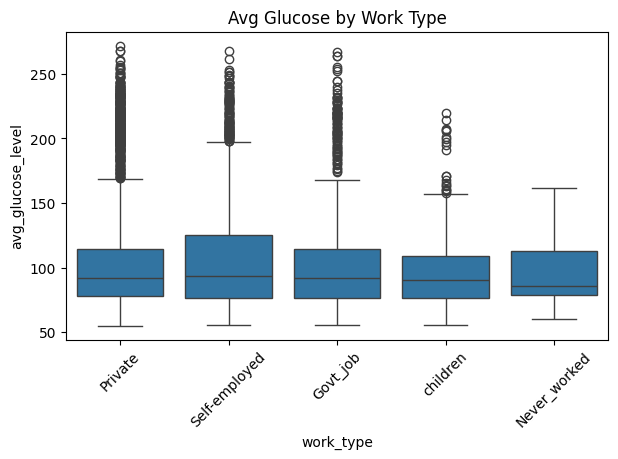


PRACTICAL 4 COMPLETED ✔


In [18]:
# PRACTICAL 4 – Hypothesis Testing with Plots
# ---------------------------------------------
# Required libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# ---------------------------------------------
# STEP 1: Upload CSV file manually
uploaded = files.upload()

# Automatically load whichever file you upload
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print("File loaded:", filename)
print(df.head())

# Remove ID column if exists
if 'id' in df.columns:
    df = df.drop(columns=['id'])

# Fill BMI missing
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

# ---------------------------------------------
# T-TEST: Male vs Female avg_glucose_level
print("\n====== T-TEST (Male vs Female Avg Glucose) ======")

male = df[df['gender'] == "Male"]['avg_glucose_level']
female = df[df['gender'] == "Female"]['avg_glucose_level']

t_stat, p_val = stats.ttest_ind(male, female, equal_var=False)

print("Male mean =", male.mean())
print("Female mean =", female.mean())
print("t-stat =", t_stat)
print("p-value =", p_val)

if p_val < 0.05:
    print("Conclusion: Reject H0 → Gender affects glucose level.")
else:
    print("Conclusion: Fail to reject H0 → No difference by gender.")

# Plot
plt.figure(figsize=(6,4))
sns.boxplot(x=df['gender'], y=df['avg_glucose_level'])
plt.title("Avg Glucose by Gender")
plt.show()

# ---------------------------------------------
# CHI-SQUARE: Smoking vs Stroke
print("\n====== CHI-SQUARE (Smoking vs Stroke) ======")

table = pd.crosstab(df['smoking_status'], df['stroke'])
print(table)

chi2, p, dof, expected = stats.chi2_contingency(table)

print("Chi-square =", chi2)
print("p-value =", p)

if p < 0.05:
    print("Conclusion: Reject H0 → Smoking affects stroke risk.")
else:
    print("Conclusion: Fail to reject H0 → No association.")

# Plot
table.plot(kind='bar', stacked=True, figsize=(7,4))
plt.title("Smoking Status vs Stroke")
plt.ylabel("Count")
plt.show()

# ---------------------------------------------
# ANOVA: Work Type vs Glucose
print("\n====== ANOVA (Work Type vs Glucose) ======")

groups = [df[df['work_type'] == wt]['avg_glucose_level'] for wt in df['work_type'].unique()]
f_stat, p_val = stats.f_oneway(*groups)

print("F-stat =", f_stat)
print("p-value =", p_val)

if p_val < 0.05:
    print("Conclusion: Reject H0 → Work type affects glucose level.")
else:
    print("Conclusion: Fail to reject H0.")

# Plot
plt.figure(figsize=(7,4))
sns.boxplot(x=df['work_type'], y=df['avg_glucose_level'])
plt.xticks(rotation=45)
plt.title("Avg Glucose by Work Type")
plt.show()

print("\nPRACTICAL 4 COMPLETED ✔")


stroke              0   1
smoking_status           
Unknown          1497  47
formerly smoked   815  70
never smoked     1802  90
smokes            747  42
Chi-square = 29.147269191399264
p-value = 2.0853997025008455e-06
Conclusion: Reject H0 → Smoking affects stroke risk.


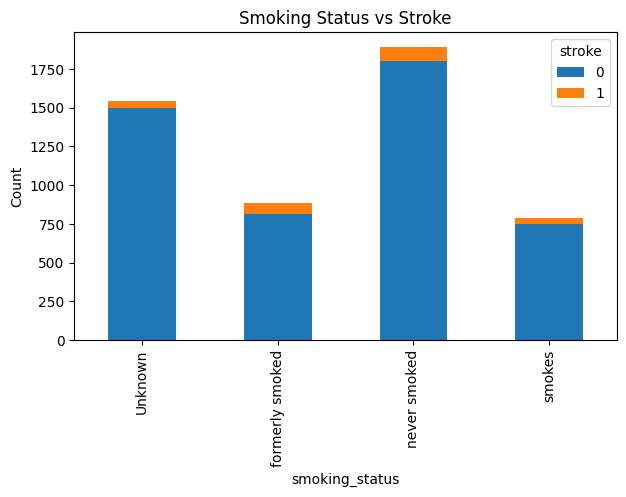

In [19]:
table = pd.crosstab(df['smoking_status'], df['stroke'])
print(table)

chi2, p, dof, expected = stats.chi2_contingency(table)

print("Chi-square =", chi2)
print("p-value =", p)

if p < 0.05:
    print("Conclusion: Reject H0 → Smoking affects stroke risk.")
else:
    print("Conclusion: Fail to reject H0 → No association.")

# Plot
table.plot(kind='bar', stacked=True, figsize=(7,4))
plt.title("Smoking Status vs Stroke")
plt.ylabel("Count")
plt.show()


====== ANOVA (Work Type vs Glucose) ======
F-stat = 16.612272641955578
p-value = 1.558660340511671e-13
Conclusion: Reject H0 → Work type affects glucose level.


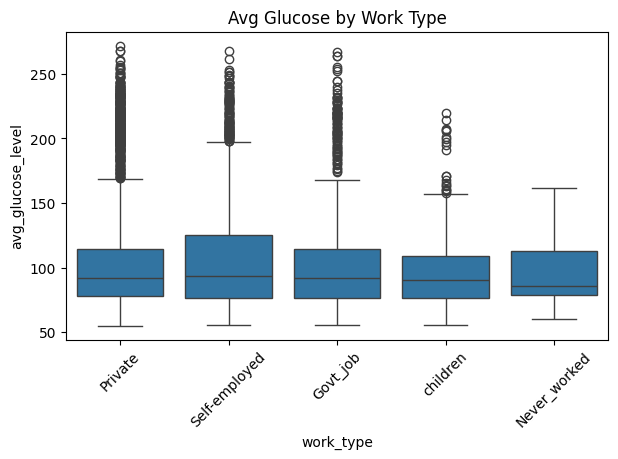

In [20]:
print("\n====== ANOVA (Work Type vs Glucose) ======")

groups = [df[df['work_type'] == wt]['avg_glucose_level'] for wt in df['work_type'].unique()]
f_stat, p_val = stats.f_oneway(*groups)

print("F-stat =", f_stat)
print("p-value =", p_val)

if p_val < 0.05:
    print("Conclusion: Reject H0 → Work type affects glucose level.")
else:
    print("Conclusion: Fail to reject H0.")

# Plot
plt.figure(figsize=(7,4))
sns.boxplot(x=df['work_type'], y=df['avg_glucose_level'])
plt.xticks(rotation=45)
plt.title("Avg Glucose by Work Type")
plt.show()
